# LAB 2 
Part I

Numerical free fall time (no drag): 28.56 s
Difference between numerical and analytical time: 0.0000 s


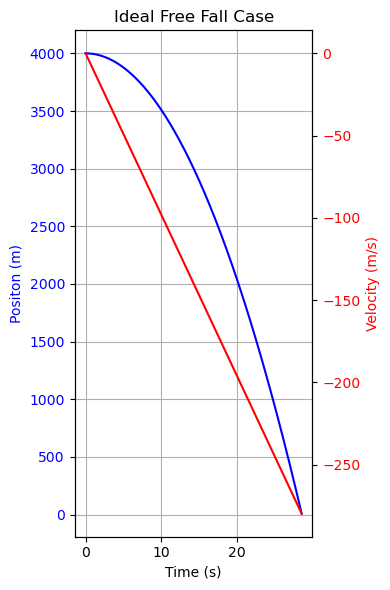

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constants
# G = 6.673E-11 
#g_o = 9.81
#Me = 5.972E24 
#Mm = 7.35E22
#Re = 6378.1
#Rm = 1738.1
#rot = 7.272E-5
g = 9.81
y0 = 4000
v0 = 0
a = 0
gamma = 2

analytic = np.sqrt(2*y0/g)

def ideal(t, Y, a, gamma):
    y, v = Y
    dydt = v
    dvdt = -g - a*v**gamma
    return [dydt, dvdt]

def ground(t, Y, a, gamma):
    return Y[0]

ground.terminal = True
ground.direction = -1

t_span = (0, 2*analytic)
y0_vec = [y0,v0]

sol = solve_ivp(ideal, t_span, y0_vec, args=(a,gamma), events=ground, t_eval=np.linspace(0,2*analytic, 1000))

t_vals = sol.t
y_vals = sol.y[0]
v_vals = sol.y[1]
numerical = sol.t_events[0][0]

print(f'Numerical free fall time (no drag): {numerical:.2f} s')
print(f'Difference between numerical and analytical time: {abs(analytic-numerical):.4f} s')

fig, ax1 = plt.subplots(figsize=(4,6))

ax1.plot(t_vals, y_vals, 'b-', label='Position (m)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Positon (m)', color = 'b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(t_vals, v_vals, 'r-', label='Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)', color = 'r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Ideal Free Fall Case')
fig.tight_layout()

Part II

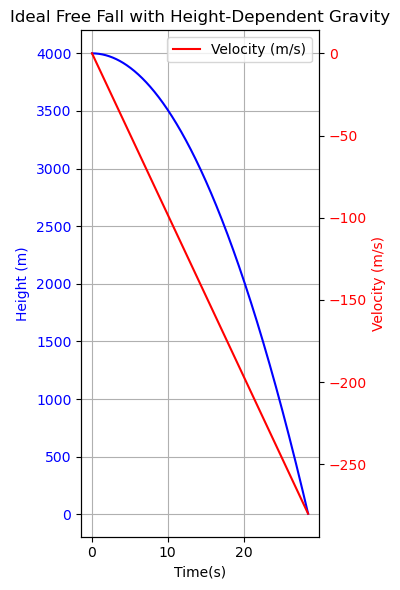

In [2]:
g0 = 9.81
R = 6378.1E3

def var_g(t, Y):
    y, v = Y
    r = R + y
    g_y = g0*(r/R)
    dydt = v
    dvdt = -g_y
    return [dydt, dvdt]

def ground(t, Y):
    return Y[0]
ground.terminal = True
ground.direction = -1

t_span = (0, 2*analytic)
y0_vector = [y0,v0]
sol_var_g = solve_ivp(var_g, t_span, y0_vector, events=ground, t_eval=np.linspace(0,2*analytic, 1000))

numerical_var_g = sol_var_g.t_events[0][0]

fig, ax3 = plt.subplots(figsize=(4,6))

ax3.plot(sol_var_g.t, sol_var_g.y[0], 'b-', label='Position above shaft bottom (m)')
ax3.set_xlabel('Time(s)')
ax3.set_ylabel('Height (m)', color='b')
ax3.tick_params(axis='y',labelcolor='b')
ax3.grid()

ax4 = ax3.twinx()
ax4.plot(sol_var_g.t, sol_var_g.y[1], 'r-', label='Velocity (m/s)')
ax4.set_ylabel('Velocity (m/s)', color='r')
ax4.tick_params(axis='y', labelcolor='r')

plt.legend()
plt.title('Ideal Free Fall with Height-Dependent Gravity')
plt.tight_layout()

### What effect does incorporating height-dependent g have on fall time?

The fall time should increase slightly because the effective gravity is weaker at higher altitudes. The curve does look similar to the constant g case, but the velocity will be slightly lower at any given time. 

In [3]:
a = g0/(50**2)
gamma = 2

def var_g_drag(t, Y):
    y, v = Y
    r = R + y
    g_y = g0*(r/R)
    dydt = v
    dvdt = -g_y - a * np.abs(v)**gamma * np.sign(v)
    return [dydt, dvdt]

def ground(t, Y, a, gamma):
    return Y[0]

ground.terminal = True
ground.direction = -1

t_span = (0, 2*np.sqrt(2*y0/g0))
y0_vector = [y0, v0]

sol_var_g_drag = solve_ivp(var_g_drag, t_span, y0_vector, events=lambda t, Y: ground(t, Y, a, gamma), t_eval=np.linspace(0,2*analytic, 1000))

numerical_var_g_drag = sol_var_g_drag.t_events[0][0]

fig, ax5 = plt.subplots()

ax5.plot(sol_var_g_drag.t, sol_var_g_drag.y[0], 'b-', label='Position above shaft bottom (m)')
ax5.set_xlabel('Time(s)')
ax5.set_ylabel('Height (m)', color='b')
ax5.tick_params(axis='y',labelcolor='b')
ax5.grid()

ax6 = ax5.twinx()
ax6.plot(sol_var_g_drag.t, sol_var_g_drag.y[1], 'r-', label='Velocity (m/s)')
ax6.set_ylabel('Velocity (m/s)', color='r')
ax6.tick_params(axis='y', labelcolor='r')

plt.title('Ideal Free Fall with Drag & Height-Dependent Gravity')
plt.tight_layout()


IndexError: index 0 is out of bounds for axis 0 with size 0

### How does drag affect fall time

With drag, velocity is limited by air resistance, and acceleration decreases over time, which results in a longer fall time when drag is included. 

Part III

The test mass bumps into the wall before reaching the bottom.


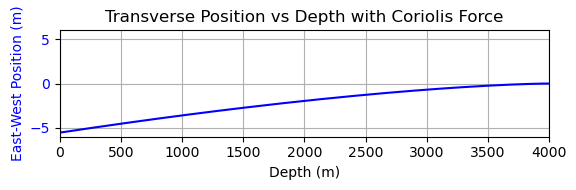

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g0 = 9.81  # Gravitational acceleration (m/s^2)
omega_z = 7.272e-5  # Earth's rotation rate (rad/s)
y0 = 4000  # Initial depth (m)
v0 = 0  # Initial velocity (m/s)
m = 1  # Assume mass of the test object (kg)

# Initial conditions for position and velocity
x0 = 0  # Initial east-west position (m)
v_x0 = 0  # Initial velocity in the east-west direction (m/s)
v_y0 = 0  # Initial velocity in the mineshaft direction (m/s)

# Define the system of ODEs including Coriolis force
def coriolis(t, Y):
    x, v_x, y, v_y, z, v_z = Y
    dydt = [v_x, 
            2 * omega_z * v_y,  # Coriolis acceleration in the x direction
            v_y, 
            -2 * omega_z * v_x - g0,  # Coriolis acceleration and gravity in the y direction
            v_z, 
            0]  # No force in the z direction
    return dydt

# Time span and initial conditions
t_span = (0, 500)  # Time span for the simulation, reduce this to prevent over-falling
y0_vector = [x0, v_x0, y0, v_y0, 0, 0]  # Initial positions and velocities

# Solve the system of equations
sol = solve_ivp(coriolis, t_span, y0_vector, t_eval=np.linspace(0, 500, 1000))

# Extract position and velocity data
x_vals = sol.y[0]  # East-west position
y_vals = sol.y[2]  # Depth position (mineshaft)
v_x_vals = sol.y[1]  # Velocity in the east-west direction
v_y_vals = sol.y[3]  # Velocity in the mineshaft direction

# Check if the transverse position exceeds 2.5m before reaching the bottom
bump_into_wall = np.any(np.abs(x_vals) > 2.5)

# Plot the transverse position (east-west) as a function of depth (mineshaft)
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(y_vals, x_vals, 'b-', label='Transverse Position vs Depth')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('East-West Position (m)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Transverse Position vs Depth with Coriolis Force')
ax.grid()

ax.set_xlim([0, 4000])  # Depth range 
ax.set_ylim([-6, 6])

plt.tight_layout()

if bump_into_wall:
    print("The test mass bumps into the wall before reaching the bottom.")
else:
    print("The test mass reaches the bottom without hitting the wall.")


The test mass bumps into the wall before reaching the bottom.


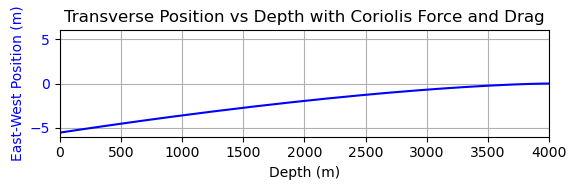

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g0 = 9.81  # Gravitational acceleration (m/s^2)
omega_z = 7.272e-5  # Earth's rotation rate (rad/s)
y0 = 4000  # Initial depth (m)
v0 = 0  # Initial velocity (m/s)
m = 1  # Assume mass of the test object (kg)
alpha = g0/(50**2)  # Drag coefficient (adjust as needed)

# Initial conditions for position and velocity
x0 = 0  # Initial east-west position (m)
v_x0 = 0  # Initial velocity in the east-west direction (m/s)
v_y0 = 0  # Initial velocity in the mineshaft direction (m/s)

# Define the system of ODEs including Coriolis force and drag
def coriolis_drag(t, Y):
    x, v_x, y, v_y, z, v_z = Y
    dydt = [v_x, 
            2 * omega_z * v_y - alpha * v_x,  # Coriolis acceleration and drag in the x direction
            v_y, 
            -2 * omega_z * v_x - g0 - alpha * v_y,  # Coriolis acceleration, gravity, and drag in the y direction
            v_z, 
            0]  # No force in the z direction
    return dydt

# Time span and initial conditions
t_span = (0, 500)  # Time span for the simulation
y0_vector = [x0, v_x0, y0, v_y0, 0, 0]  # Initial positions and velocities

# Solve the system of equations
sol = solve_ivp(coriolis_drag, t_span, y0_vector, t_eval=np.linspace(0, 500, 1000))

# Extract position and velocity data
x_vals = sol.y[0]  # East-west position
y_vals = sol.y[2]  # Depth position (mineshaft)
v_x_vals = sol.y[1]  # Velocity in the east-west direction
v_y_vals = sol.y[3]  # Velocity in the mineshaft direction

# Check if the transverse position exceeds 2.5m before reaching the bottom
bump_into_wall = np.any(np.abs(x_vals) > 2.5)

# Plot the transverse position (east-west) as a function of depth (mineshaft)
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(y_vals, x_vals, 'b-', label='Transverse Position vs Depth')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('East-West Position (m)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Transverse Position vs Depth with Coriolis Force and Drag')
ax.grid()

ax.set_xlim([0, 4000])  # Depth range 
ax.set_ylim([-6, 6])

plt.tight_layout()

if bump_into_wall:
    print("The test mass bumps into the wall before reaching the bottom.")
else:
    print("The test mass reaches the bottom without hitting the wall.")


### Does drag make a difference?

Drag should makes a difference, slowing down the vertical velocity, thus slowing down the 

Part IV

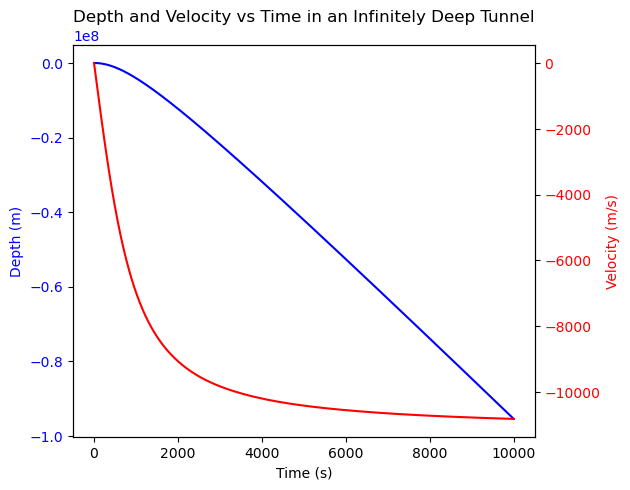

Time to reach the center of the Earth: 0.00 seconds
Speed at the center of the Earth: 0.00 m/s
Orbital period: 5069.86 seconds
Comparison of crossing time to orbital period: 0.0000 times the orbital period


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.673E-11    # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972E24     # Mass of Earth (kg)
R = 6378.1E3     # Radius of Earth (m)

# Initial conditions
y0 = 0  # Initial depth (at the surface of the Earth)
v0 = 0  # Initial velocity (starting from rest)

# Function for the equation of motion inside the Earth
def eq_of_motion(t, Y):
    y, v = Y
    gravity = -G * M / (R - y)**2  # Gravity at depth y
    dydt = v
    dvdt = gravity
    return [dydt, dvdt]

# Time span for solving the equations (e.g., for 2 hours)
t_span = (0, 10000)  # 10000 seconds to ensure we capture enough time
y0_vec = [y0, v0]

# Solve the ODE
sol = solve_ivp(eq_of_motion, t_span, y0_vec, t_eval=np.linspace(0, 10000, 1000))

# Extract the time, position (depth), and velocity
t_vals = sol.t
y_vals = sol.y[0]
v_vals = sol.y[1]

# Find the time to reach the center (y = R) and the speed at the center
center_time = t_vals[np.abs(y_vals - R).argmin()]
center_speed = v_vals[np.abs(y_vals - R).argmin()]

# Plot depth and velocity as a function of time
fig, ax1 = plt.subplots()

# Plot depth vs time
ax1.plot(t_vals, y_vals, 'b-', label='Depth (m)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Depth (m)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot velocity vs time on a secondary axis
ax2 = ax1.twinx()
ax2.plot(t_vals, v_vals, 'r-', label='Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Depth and Velocity vs Time in an Infinitely Deep Tunnel')
plt.show()

# Calculate the orbital speed and period
orbital_speed = np.sqrt(G * M / R)  # Orbital speed
orbital_period = 2 * np.pi * R / orbital_speed  # Orbital period

# Print results
print(f'Time to reach the center of the Earth: {center_time:.2f} seconds')
print(f'Speed at the center of the Earth: {center_speed:.2f} m/s')
print(f'Orbital period: {orbital_period:.2f} seconds')

# Comparison of crossing time and orbital period
print(f'Comparison of crossing time to orbital period: {center_time/orbital_period:.4f} times the orbital period')


Part V

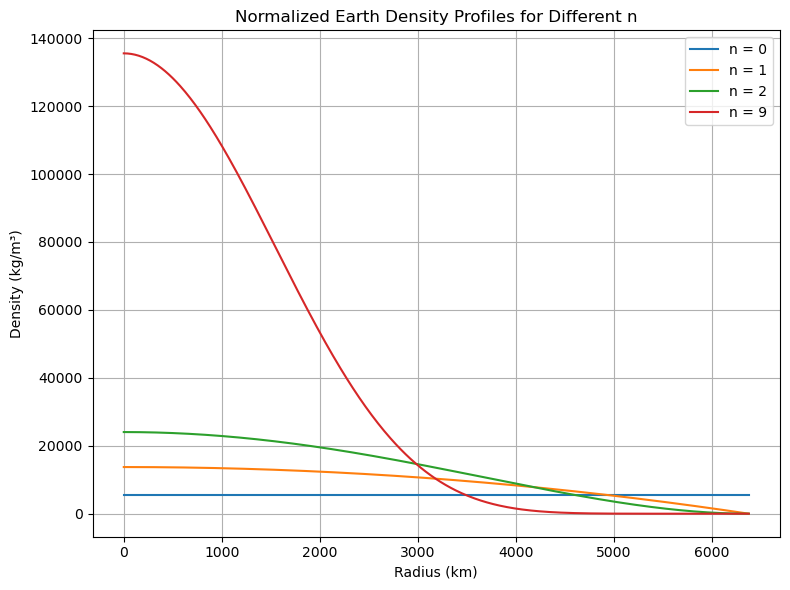

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
R_earth = 6378.1E3  # Earth radius in meters
M_earth = 5.972E24  # Mass of the Earth in kg

# Density function for given n
def rho(r, n):
    return (1 - (r**2 / R_earth**2))**n

# Mass integral function for a given n
def mass_integral(n):
    integral, _ = quad(lambda r: rho(r, n) * r**2, 0, R_earth)
    return integral

# Compute the normalizing constant for different values of n
def compute_rho_n(n):
    integral = mass_integral(n)
    return M_earth / (4 * np.pi * integral)

# Plot normalized density profiles for different values of n
radii = np.linspace(0, R_earth, 500)  # Radii from 0 to Earth radius
n_values = [0, 1, 2, 9]  # Exponents n to consider

plt.figure(figsize=(8, 6))

# Plot each density profile
for n in n_values:
    rho_n = compute_rho_n(n)  # Compute normalizing constant for the current n
    density = rho_n * (1 - (radii**2 / R_earth**2))**n  # Density as a function of radius
    plt.plot(radii / 1E3, density, label=f"n = {n}")  # Convert radii to km for plot

# Add labels and legend
plt.xlabel('Radius (km)')
plt.ylabel('Density (kg/m³)')
plt.title('Normalized Earth Density Profiles for Different n')
plt.legend()
plt.grid(True)
plt.tight_layout()


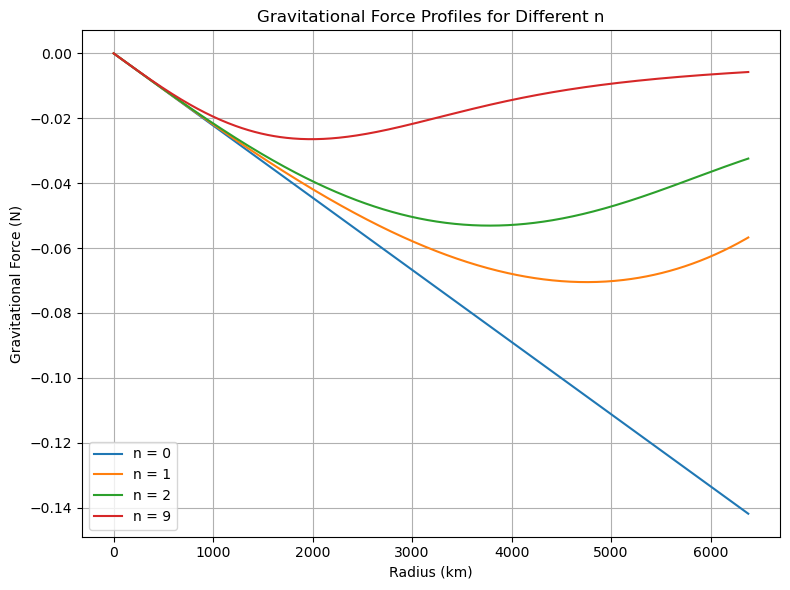

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
R_earth = 6378.1E3  # Earth radius in meters
M_earth = 5.972E24  # Mass of the Earth in kg
G = 6.673E-11  # Gravitational constant in m^3/(kg*s^2)

# Density function for given n
def rho(r, n):
    return (1 - (r**2 / R_earth**2))**n

# Mass enclosed function for a given n and radius r
def mass_enclosed(r, n):
    integral, _ = quad(lambda r_: rho(r_, n) * r_**2, 0, r)
    return integral

# Compute the force as a function of radius for a given n
def force_profile(n, radii):
    force = np.zeros_like(radii)
    for i, r in enumerate(radii):
        if r == 0:
            force[i] = 0
        else:
            M_enc = mass_enclosed(r, n)
            force[i] = -G * M_enc * 1e3 / r**2  # Force in Newtons
    return force

# Plot force profiles for different values of n
radii = np.linspace(0, R_earth, 500)  # Radii from 0 to Earth radius in meters
n_values = [0, 1, 2, 9]  # Exponents n to consider

plt.figure(figsize=(8, 6))

# Plot each force profile
for n in n_values:
    force = force_profile(n, radii)  # Compute the force profile for the current n
    plt.plot(radii / 1E3, force, label=f"n = {n}")  # Convert radii to km for plot

# Add labels and legend
plt.xlabel('Radius (km)')
plt.ylabel('Gravitational Force (N)')
plt.title('Gravitational Force Profiles for Different n')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
